In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'..\..\..\data\clean_data\salaries_and_descriptions.csv',encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,Country,Description,Glassdoor Salary Estimate,Position_clean,Unnamed: 0.1,base_pay,bonus_pay,cash_bonus,company,...,company_type_Company - Private,company_type_Company - Public,company_type_Government,company_type_Nonprofit Organization,company_type_Subsidiary or Business Segment,company_year_founded,lower_bound_salary,salary,stock_bonus,upper_bound_salary
0,0,US,Facebook's mission is to give people the power...,193225.0,Data Scientist,1,198153.22,19650.0,19650.0,Facebook,...,0,1,0,0,0,2004.0,131000.0,198153.22,33267.45,286890.0
1,1,US,Facebook's mission is to give people the power...,193225.0,Data Scientist,1,198153.22,19650.0,19650.0,Facebook,...,0,1,0,0,0,2004.0,131000.0,198153.22,33267.45,286890.0
2,2,US,Facebook's mission is to give people the power...,184055.0,Data Scientist,1,198153.22,19650.0,19650.0,Facebook,...,0,1,0,0,0,2004.0,131000.0,198153.22,33267.45,286890.0
3,3,US,Facebook's mission is to give people the power...,184055.0,Data Scientist,1,198153.22,19650.0,19650.0,Facebook,...,0,1,0,0,0,2004.0,131000.0,198153.22,33267.45,286890.0
4,4,US,Facebook's mission is to give people the power...,184055.0,Data Scientist,1,198153.22,19650.0,19650.0,Facebook,...,0,1,0,0,0,2004.0,131000.0,198153.22,33267.45,286890.0


In [4]:
df['Position_clean'].unique()

array(['Data Scientist', 'Data Scientist Intern', 'Senior Data Scientist',
       'Lead Data Scientist', 'Junior Data Scientist'], dtype=object)

In [5]:
df_ds = df[df['Position_clean'] == 'Data Scientist']
df_dsi = df[df['Position_clean'] == 'Data Scientist Intern']
df_sds = df[df['Position_clean'] == 'Senior Data Scientist']
df_lds = df[df['Position_clean'] == 'Lead Data Scientist']
df_jds = df[df['Position_clean'] == 'Junior Data Scientist']

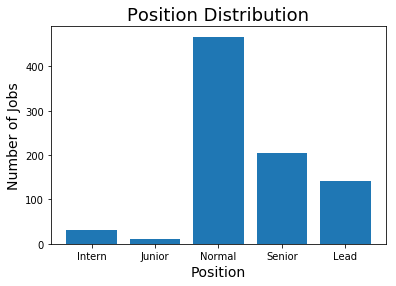

In [21]:
y1 = df_dsi.shape[0]
y2 = df_jds.shape[0]
y3 = df_ds.shape[0]
y4 = df_sds.shape[0]
y5 = df_lds.shape[0]

y = [y1,y2,y3,y4,y5]

x = [1,2,3,4,5]
labels = ['Intern','Junior','Normal','Senior','Lead']

plt.bar(x,y)
plt.xticks(x,labels)
plt.ylabel("Number of Jobs",fontsize = 14)
plt.xlabel("Position",fontsize = 14)
plt.title("Position Distribution",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/Position_Distribution.pdf",bbox_inches = "tight")
plt.show()

In [8]:
ds_mean_sal = df_ds['salary'].mean()
dsi_mean_sal = df_dsi['salary'].mean()
sds_mean_sal = df_sds['salary'].mean()
lds_mean_sal = df_lds['salary'].mean()
jds_mean_sal = df_jds['salary'].mean()

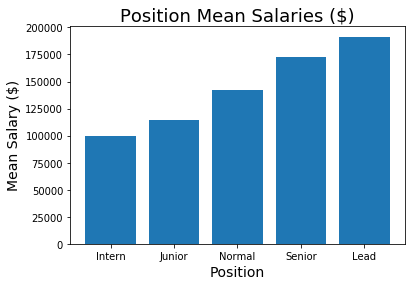

In [23]:
y = [dsi_mean_sal,jds_mean_sal,ds_mean_sal,sds_mean_sal,lds_mean_sal]
x = [1,2,3,4,5]
labels = ['Intern','Junior','Normal','Senior','Lead']

plt.bar(x,y)
plt.xticks(x,labels)
plt.ylabel("Mean Salary ($)",fontsize = 14)
plt.xlabel("Position",fontsize = 14)
plt.title("Position Mean Salaries ($)",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/Position_Mean_Salaries.pdf",bbox_inches = "tight")
plt.show()

In [24]:
ds_sals = df_ds['salary'].tolist()
dsi_sals = df_dsi['salary'].tolist()
sds_sals = df_sds['salary'].tolist()
lds_sals = df_lds['salary'].tolist()
jds_sals = df_jds['salary'].tolist()

In [25]:
x1 = [1 for i in range(len(dsi_sals))]
x2 = [2 for i in range(len(jds_sals))]
x3 = [3 for i in range(len(ds_sals))]
x4 = [4 for i in range(len(sds_sals))]
x5 = [5 for i in range(len(lds_sals))]

x = x1 + x2 + x3 + x4 + x5

In [26]:
sals = dsi_sals + jds_sals + ds_sals + sds_sals + lds_sals 

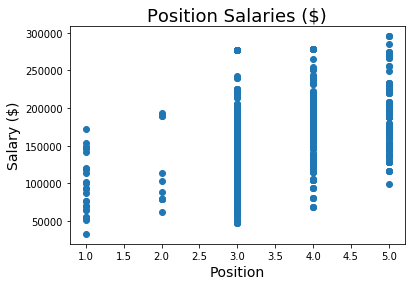

In [27]:
plt.scatter(x,sals)
plt.ylabel("Salary ($)",fontsize = 14)
plt.xlabel("Position",fontsize = 14)
plt.title("Position Salaries ($)",fontsize = 18)
plt.savefig("../../../figures/exploratory_figures/Position_Salaries.pdf",bbox_inches = "tight")
plt.show()

# Splitting by Country

In [28]:
df_ca = df[df['Country'] == 'CA']
df_us = df[df['Country'] == 'US']
df_uk = df[df['Country'] == 'UK']

In [29]:
ca_dsi_mean = df_ca[df_ca['Position_clean'] == 'Data Scientist Intern']['salary'].mean()
ca_jds_mean = df_ca[df_ca['Position_clean'] == 'Junior Data Scientist']['salary'].mean()
ca_ds_mean = df_ca[df_ca['Position_clean'] == 'Data Scientist']['salary'].mean()
ca_sds_mean = df_ca[df_ca['Position_clean'] == 'Senior Data Scientist']['salary'].mean()
ca_lds_mean = df_ca[df_ca['Position_clean'] == 'Lead Data Scientist']['salary'].mean()

us_dsi_mean = df_us[df_us['Position_clean'] == 'Data Scientist Intern']['salary'].mean()
us_jds_mean = df_us[df_us['Position_clean'] == 'Junior Data Scientist']['salary'].mean()
us_ds_mean = df_us[df_us['Position_clean'] == 'Data Scientist']['salary'].mean()
us_sds_mean = df_us[df_us['Position_clean'] == 'Senior Data Scientist']['salary'].mean()
us_lds_mean = df_us[df_us['Position_clean'] == 'Lead Data Scientist']['salary'].mean()

uk_dsi_mean = df_uk[df_uk['Position_clean'] == 'Data Scientist Intern']['salary'].mean()
uk_jds_mean = df_uk[df_uk['Position_clean'] == 'Junior Data Scientist']['salary'].mean()
uk_ds_mean = df_uk[df_uk['Position_clean'] == 'Data Scientist']['salary'].mean()
uk_sds_mean = df_uk[df_uk['Position_clean'] == 'Senior Data Scientist']['salary'].mean()
uk_lds_mean = df_uk[df_uk['Position_clean'] == 'Lead Data Scientist']['salary'].mean()

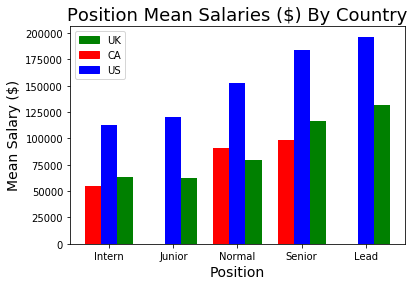

In [30]:
y = [[ca_dsi_mean,ca_jds_mean,ca_ds_mean,ca_sds_mean,ca_lds_mean],
     [us_dsi_mean,us_jds_mean,us_ds_mean,us_sds_mean,us_lds_mean],
     [uk_dsi_mean,uk_jds_mean,uk_ds_mean,uk_sds_mean,uk_lds_mean]]

x = [[0.75,1.75,2.75,3.75,4.75],[1,2,3,4,5],[1.25,2.25,3.25,4.25,5.25]]

labels = ['Intern','Junior','Normal','Senior','Lead']
colors = ['red','blue','green']

for i in range(3):
    plt.bar(x[i],y[i],width=0.25,color = colors[i])
plt.xticks(x[1],labels)
plt.ylabel("Mean Salary ($)",fontsize=14)
plt.xlabel("Position",fontsize=14)
plt.title("Position Mean Salaries ($) By Country",fontsize = 18)

colors = {'CA':'red', 'US':'blue','UK':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig("../../../figures/exploratory_figures/Position_Mean_Salaries_Country.pdf",bbox_inches = "tight")
plt.show()

In [31]:
ca_dsi_list = df_ca[df_ca['Position_clean'] == 'Data Scientist Intern']['salary'].tolist()
ca_jds_list = df_ca[df_ca['Position_clean'] == 'Junior Data Scientist']['salary'].tolist()
ca_ds_list = df_ca[df_ca['Position_clean'] == 'Data Scientist']['salary'].tolist()
ca_sds_list = df_ca[df_ca['Position_clean'] == 'Senior Data Scientist']['salary'].tolist()
ca_lds_list = df_ca[df_ca['Position_clean'] == 'Lead Data Scientist']['salary'].tolist()

us_dsi_list = df_us[df_us['Position_clean'] == 'Data Scientist Intern']['salary'].tolist()
us_jds_list = df_us[df_us['Position_clean'] == 'Junior Data Scientist']['salary'].tolist()
us_ds_list = df_us[df_us['Position_clean'] == 'Data Scientist']['salary'].tolist()
us_sds_list = df_us[df_us['Position_clean'] == 'Senior Data Scientist']['salary'].tolist()
us_lds_list = df_us[df_us['Position_clean'] == 'Lead Data Scientist']['salary'].tolist()

uk_dsi_list = df_uk[df_uk['Position_clean'] == 'Data Scientist Intern']['salary'].tolist()
uk_jds_list = df_uk[df_uk['Position_clean'] == 'Junior Data Scientist']['salary'].tolist()
uk_ds_list = df_uk[df_uk['Position_clean'] == 'Data Scientist']['salary'].tolist()
uk_sds_list = df_uk[df_uk['Position_clean'] == 'Senior Data Scientist']['salary'].tolist()
uk_lds_list = df_uk[df_uk['Position_clean'] == 'Lead Data Scientist']['salary'].tolist()

sals = [[ca_dsi_list,ca_jds_list,ca_ds_list,ca_sds_list,ca_lds_list],
        [us_dsi_list,us_jds_list,us_ds_list,us_sds_list,us_lds_list],
        [uk_dsi_list,uk_jds_list,uk_ds_list,uk_sds_list,uk_lds_list]]

In [32]:
x = []

count = 0
for i in [-0.25,0,0.25]:

    x1 = [1+i for j in range(len(sals[count][0]))]
    x2 = [2+i for j in range(len(sals[count][1]))]
    x3 = [3+i for j in range(len(sals[count][2]))]
    x4 = [4+i for j in range(len(sals[count][3]))]
    x5 = [5+i for j in range(len(sals[count][4]))]

    x_temp = [x1,x2,x3,x4,x5]
    
    x.append(x_temp)
    count+=1

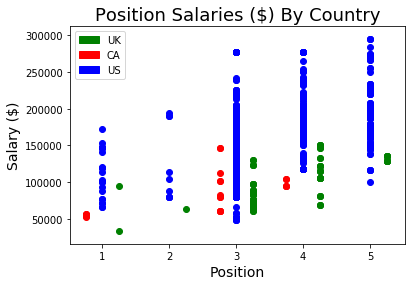

In [35]:
colors = ['red','blue','green']

for i in range(len(sals)):
    for j in range(len(sals[0])):
        plt.scatter(x[i][j],sals[i][j],color = colors[i])
        
plt.ylabel("Salary ($)",fontsize=14)
plt.xlabel("Position",fontsize=14)
plt.title("Position Salaries ($) By Country",fontsize=18)
colors = {'CA':'red', 'US':'blue','UK':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig("../../../figures/exploratory_figures/Position_Salaries_Country.pdf",bbox_inches = "tight")
plt.show()

# Correlation Analysis

In [95]:
def position_map(pos_hierarchy,df):
    pos_mapping = {'Data Scientist Intern':pos_hierarchy[0],
               'Junior Data Scientist':pos_hierarchy[1],
               'Data Scientist':pos_hierarchy[2],
               'Senior Data Scientist':pos_hierarchy[3],
               'Lead Data Scientist':pos_hierarchy[4]}
    
    df_mapped = df.replace({'Position_clean':pos_mapping})[['salary','Position_clean']]
    return df_mapped

In [96]:
pos_ranks = [1,2,3,4,5]
mapped_df = position_map(pos_ranks,df)
mapped_df.corr()

,salary,Position_clean
salary,1.000000,0.434659
Position_clean,0.434659,1.000000


In [97]:
pos_ranks = [1,1,3,4,5]
mapped_df = position_map(pos_ranks,df)
mapped_df.corr()

,salary,Position_clean
salary,1.000000,0.432615
Position_clean,0.432615,1.000000


In [102]:
sum_means = dsi_mean_sal+jds_mean_sal+ds_mean_sal+sds_mean_sal+lds_mean_sal

pos_ranks = [dsi_mean_sal/sum_means,
             jds_mean_sal/sum_means,
             ds_mean_sal/sum_means,
             sds_mean_sal/sum_means,
             lds_mean_sal/sum_means]

mapped_df = position_map(pos_ranks,df)
mapped_df.corr()

,salary,Position_clean
salary,1.000000,0.437561
Position_clean,0.437561,1.000000


In [104]:
pos_ranks

[0.13817498174891568,
 0.1592765587525753,
 0.19722997691331484,
 0.23931850271410038,
 0.2659999798710939]